## The Monty Hall problem ##

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

Rules:

After choosing a door, the door remains closed. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

In [7]:
# Defining a function for simulating the Monty Hall problem, number_of_rounds=1000

import numpy as np

def monty_hall_simulation(number_of_rounds):
    # Counters for wins, if sticking with intial choice (stay_wins), or switching (switch_wins)
    stay_wins = 0
    switch_wins = 0

    for _ in range(number_of_rounds):
        # The car is behind one of the dorrs, randomly
        doors = [0, 0, 0]  # Initialize doors, 0 is goat, 1 is car
        car_position = np.random.randint(0, 3)
        doors[car_position] = 1

        # Player makes their first choice
        player_choice = np.random.randint(0, 3)

        # Host opens a door with a goat
        # Host cannot open the door with the car or the player's initial choice
        remaining_doors = [i for i in range(3) if i != player_choice and doors[i] == 0]
        host_opens = np.random.choice(remaining_doors)

        # Determine what's behind the remaining unopened door
        remaining_doors = [i for i in range(3) if i != player_choice and i != host_opens]
        switch_choice = remaining_doors[0]

        # Check if the player wins by sticking with their first choice
        if doors[player_choice] == 1:
            stay_wins += 1
        
        # Check if the player wins by switching
        if doors[switch_choice] == 1:
            switch_wins += 1

    return stay_wins, switch_wins

# simulation
number_of_rounds = 10000
stay_wins, switch_wins = monty_hall_simulation(number_of_rounds)

print(f"After {number_of_rounds} trials:")
print(f"Number of wins for sticking with their initial choice: {stay_wins}")
print(f"Number of wins for switching door: {switch_wins}")

stay_win_rate = (stay_wins / number_of_rounds) * 100
switch_win_rate = (switch_wins / number_of_rounds) * 100

print(f"Win rate for sticking with their initial choice: {stay_win_rate:.2f}%")
print(f"Win rate for switching door: {switch_win_rate:.2f}%")

After 10000 trials:
Number of wins for sticking with their initial choice: 3347
Number of wins for switching door: 6653
Win rate for sticking with their initial choice: 33.47%
Win rate for switching door: 66.53%


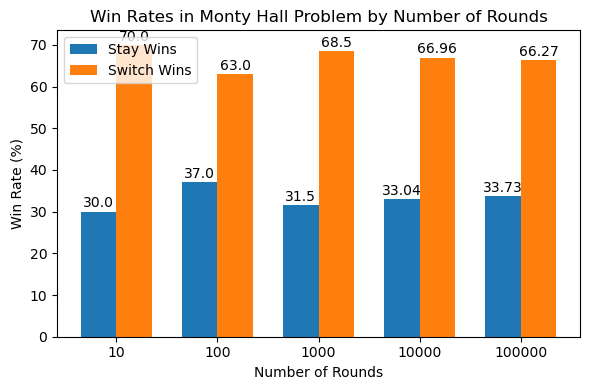

In [22]:
# Same, number_of_rounds=10, 100, 1000, 10000, 100000 with visualization by bar plotting

import matplotlib.pyplot as plt

# Defining a function for simulating the Monty Hall problem
def monty_hall_simulation(number_of_rounds):
    # Counters for wins, if sticking with initial choice (stay_wins), or switching (switch_wins)
    stay_wins = 0
    switch_wins = 0

    for _ in range(number_of_rounds):
        # The car is behind one of the doors, randomly
        doors = [0, 0, 0]  # Initialize doors, 0 is goat, 1 is car
        car_position = np.random.randint(0, 3)
        doors[car_position] = 1

        # Player makes their first choice
        player_choice = np.random.randint(0, 3)

        # Host opens a door with a goat
        # Host cannot open the door with the car or the player's initial choice
        remaining_doors = [i for i in range(3) if i != player_choice and doors[i] == 0]
        host_opens = np.random.choice(remaining_doors)

        # Determine what's behind the remaining unopened door
        remaining_doors = [i for i in range(3) if i != player_choice and i != host_opens]
        switch_choice = remaining_doors[0]

        # Check if the player wins by sticking with their first choice
        if doors[player_choice] == 1:
            stay_wins += 1
        
        # Check if the player wins by switching
        if doors[switch_choice] == 1:
            switch_wins += 1

    return stay_wins, switch_wins

# List of number of rounds to simulate
rounds_list = [10, 100, 1000, 10000, 100000]

# Lists to store results
stay_win_rates = []
switch_win_rates = []

# Run simulations and store results
for number_of_rounds in rounds_list:
    stay_wins, switch_wins = monty_hall_simulation(number_of_rounds)

    stay_win_rate = (stay_wins / number_of_rounds) * 100
    switch_win_rate = (switch_wins / number_of_rounds) * 100

    stay_win_rates.append(stay_win_rate)
    switch_win_rates.append(switch_win_rate)

# Plotting the results
fig, ax = plt.subplots(figsize=(6, 4))

x = np.arange(len(rounds_list))
width = 0.35

bars1 = ax.bar(x - width/2, stay_win_rates, width, label='Stay Wins')
bars2 = ax.bar(x + width/2, switch_win_rates, width, label='Switch Wins')

#plotting
ax.set_xlabel('Number of Rounds')
ax.set_ylabel('Win Rate (%)')
ax.set_title('Win Rates in Monty Hall Problem by Number of Rounds')
ax.set_xticks(x)
ax.set_xticklabels(rounds_list)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()
plt.show()

In [33]:
''' Permutation test to see if difference in win rates by sticking or switching are due to change or are statistically 
significant'''

def permutation_test(stay_wins, switch_wins, n_permutations=10000):
    n_total = stay_wins + switch_wins
    observed_diff = (switch_wins / (n_total / 2)) - (stay_wins / (n_total / 2))

    combined_wins = np.array([1] * stay_wins + [0] * (n_total // 2 - stay_wins) + [1] * switch_wins + [0] * (n_total // 2 - switch_wins))

    diffs = []
    for _ in range(n_permutations):
        np.random.shuffle(combined_wins)
        perm_stay_wins = np.sum(combined_wins[:n_total // 2])
        perm_switch_wins = np.sum(combined_wins[n_total // 2:])
        perm_diff = (perm_switch_wins / (n_total / 2)) - (perm_stay_wins / (n_total / 2))
        diffs.append(perm_diff)
    
    diffs = np.array(diffs)
    p_value = np.mean(diffs >= observed_diff)
    return observed_diff, p_value

observed_diff, p_value = permutation_test(stay_wins, switch_wins)

print(f"Observed difference: {observed_diff:.4f}")
print(f"P-value: {p_value:.5f}")

Observed difference: 0.6796
P-value: 0.00000


All simulations show that switching door would be the best strategy!